In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Hides the GPU from TensorFlow
tf.config.set_visible_devices([], 'GPU') 

/Users/paulkoslowsky/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Notes for me

### Simple Linear Regression with Keras

In [3]:
n = 1000  # observations
b0 = 30   # intercept
b1 = 5    # slope

np.random.seed(123)

x = np.random.uniform(-1, 1, size=n).reshape(-1, 1) # Features in 2D array for sklearn
y = b0 + b1*x.squeeze() + np.random.normal(size=n)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 676.8830
Epoch 2/10
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 248.3154

/Users/paulkoslowsky/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 190.7096
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 52.6107
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 16.4119
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 5.5374
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6434
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 1.5941
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 1.3737
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - loss: 1.0939
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 1.0275


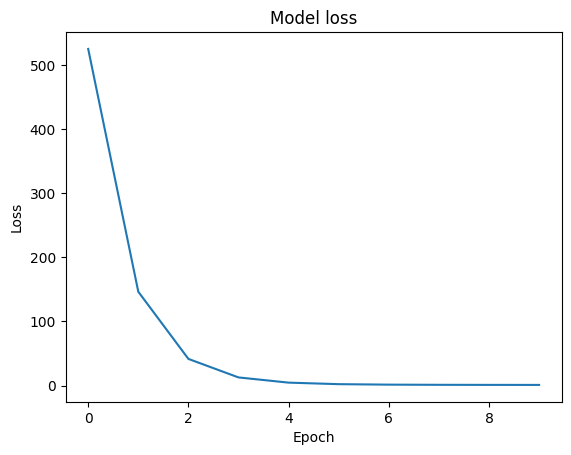

In [4]:
# Define model architecture
model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=(1,))
])

# Compile model
model.compile(optimizer='sgd', loss='mse')

# Fit model
history = model.fit(x, y, epochs=10)

# Plot loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
model.get_weights()

[array([[4.2546544]], dtype=float32), array([29.932415], dtype=float32)]

### BINARY

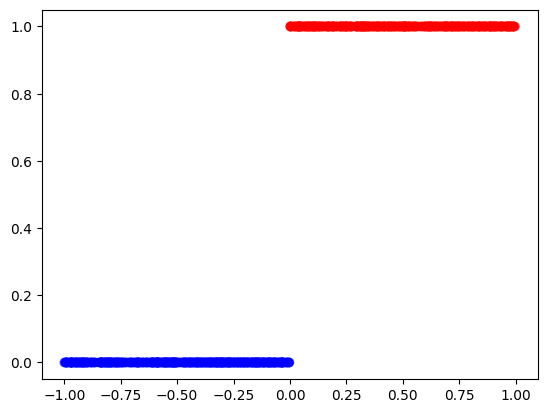

In [8]:
# Generate synthetic data for binary classification
np.random.seed(123)
x = np.random.uniform(-1, 1, size=n)
y = np.where(x > 0, 1, 0)

# Plot
plt.scatter(x, y, c=y, cmap='bwr', alpha=0.5)
plt.show()

Epoch 1/30


/Users/paulkoslowsky/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 3.7920e-04 - loss: 0.9129
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.0042 - loss: 0.8854
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.0026 - loss: 0.8518  
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.0064 - loss: 0.8317  
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.0061 - loss: 0.8005  
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.0159 - loss: 0.7793
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0240 - loss: 0.7562 
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.0644 - loss: 0.7330
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.1438 - loss: 0.7123
Epoch 10/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.5307 - loss: 0.6925
Epoch 11/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.8314 - loss: 0.6740
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step -

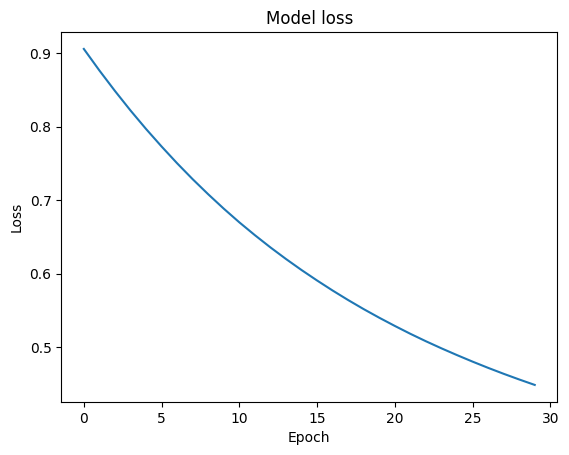

In [15]:
### Sigmoid Activation Function

#When predicting a binary response, we use a sigmoid activation function.
# Define model architecture
model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=(1,), activation='sigmoid')
])

# Compile model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Fit model
history = model.fit(x, y, epochs=30, verbose=1)

# Plot loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [11]:
model.get_weights()

[array([[3.9590526]], dtype=float32), array([-0.03301461], dtype=float32)]

| Parameter       | Increase Effect                      | Decrease Effect                   | Notes             |
|----------------|---------------------------------------|-----------------------------------|-------------------|
| `learning_rate`| Faster training, can become unstable  | Slower but more stable            | Try 0.01–0.1      |
| `momentum`     | Smoother updates, faster convergence  | More fluctuation, less smoothing  | Try 0.9–0.99      |
| `epochs`       | More learning, risk of overfitting    | May stop too early, underfitting  | Try 100–300       |


/Users/paulkoslowsky/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 0.5808
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 0.1463
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 0.0973
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 0.0859
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - loss: 0.0809
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 0.0800
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 0.0719
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - loss: 0.0746
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - loss: 0.0645
Epoch 10/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.0667
Epoch 11/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0716
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 0.0632
Epoch 13/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.0674
Epoch 14/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 0.0647
Epoch 15/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss

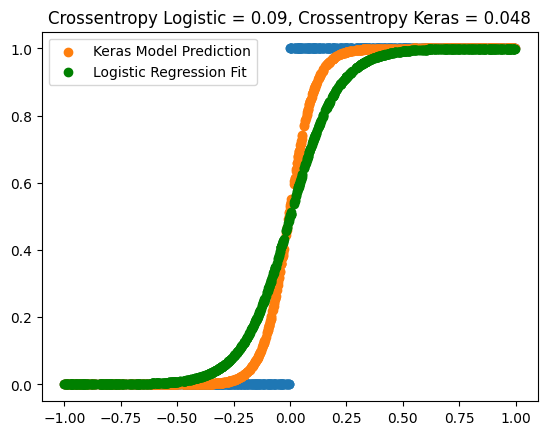

In [14]:
# Define the model
model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=(1,), activation='sigmoid')
])
# Compile the model
model.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.95), # THIS CAN BE ADAPTED
              loss='binary_crossentropy')

# Fit the model
history = model.fit(x, y, epochs=30, verbose=1) #THIS CAN BE ADAPTED


# Predict using the trained model
pred = model.predict(x).flatten()

# Create a DataFrame for easier plotting
df = pd.DataFrame({'x': x.flatten(), 'y': y, 'pred': pred})

# Logistic Regression for comparison
log_reg = LogisticRegression()
log_reg.fit(x.reshape(-1,1), y)
log_reg_pred = log_reg.predict_proba(x.reshape(-1,1))[:, 1]
crossentropy_logistic = log_loss(y, log_reg_pred)



# Plot
plt.scatter(df['x'], df['y'])
plt.scatter(df['x'], df['pred'], label='Keras Model Prediction')
plt.scatter(x=df['x'], y=log_reg_pred, color='green', label='Logistic Regression Fit')
plt.title(f"Crossentropy Logistic = {round(crossentropy_logistic, 3)}, "
          f"Crossentropy Keras = {round(min(history.history['loss']), 3)}")
plt.legend()
plt.show()